<a href="https://colab.research.google.com/github/gn0262487838/python_ipynb_ML_text/blob/master/classification_text_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

from sklearn.datasets import load_iris
iris = load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [0]:

import pandas as pd

df = pd.DataFrame(iris["data"],columns=iris["feature_names"])
df["target"] = iris["target"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [0]:

# pandas可算出相關係數函式: .corr()
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


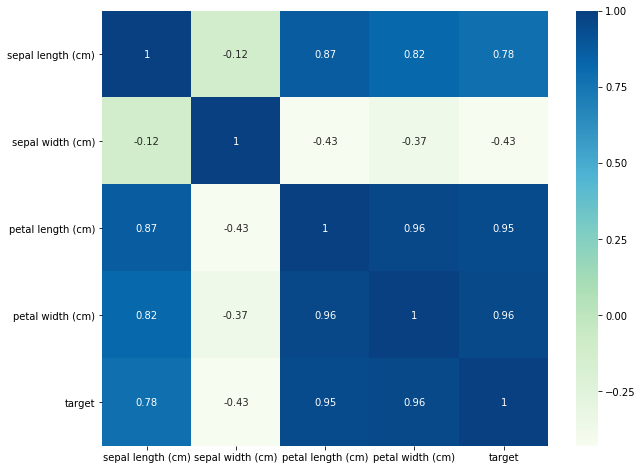

In [0]:

import matplotlib.pyplot as plt

# 此函示庫可視為matplotlib的補強。
import seaborn as sns

# 如果每次要show圖太麻煩,可用%matplotlib inline 則可不用每次代碼後都打.show()。
%matplotlib inline

# 在作資料處理時，注意一律使用float喔,不然再跑資料處理會有問題!!!
# pandas中使用astype()去做轉換。

# 圖像呈現的大小設定。 
plt.figure(figsize=(10,8))

# 參數: cmap 調整顏色，顏色代碼請搜尋matplotlib colormap。
# 參數: annot 在圖中呈現係數。
sns.heatmap(df.astype("float").corr(),cmap="GnBu", annot=True)


In [0]:

from sklearn.model_selection import train_test_split
# goals
# train _test_split >>> (feature 90%, feature 10%, target 90%, target 10%)

# axis = 1 表示行,即你要拿掉target此行。
x_train, x_test, y_train, y_test = train_test_split(df.drop(["target"],axis=1),df["target"],test_size=0.1)


In [0]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
# fit()表示開始訓練。
clf.fit(x_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

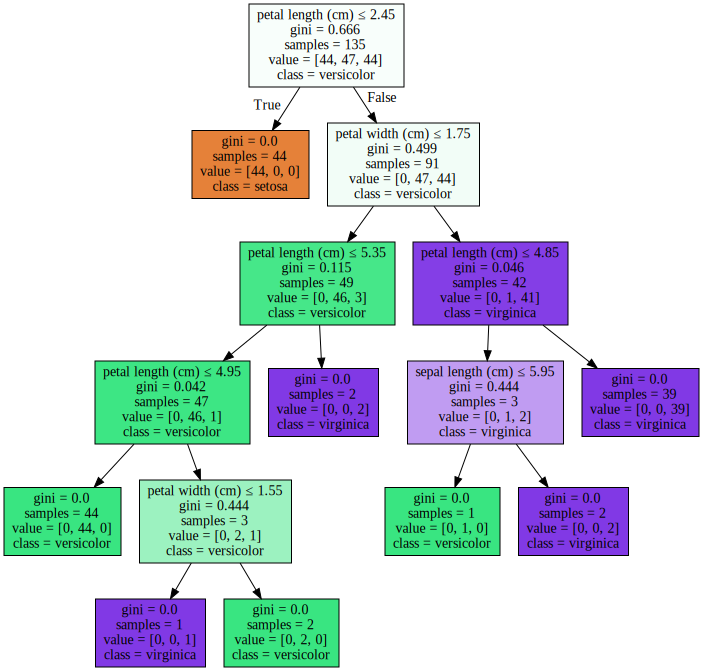

In [0]:
from sklearn.tree import export_graphviz
import graphviz
# 參數 filled 讓graphviz變得漂亮點，填入顏色。
g = export_graphviz(clf,out_file = None,
                feature_names = iris["feature_names"], class_names = iris["target_names"], filled=True, special_characters=True)

# 產生決策圖並印出。
graph = graphviz.Source(g)
graph


In [0]:
test_result = clf.predict(x_test)
print("預測結果:",list(test_result))
print("實際結果:",list(y_test))



預測結果: [1, 2, 2, 0, 2, 2, 0, 1, 0, 0, 1, 2, 0, 0, 1]
實際結果: [1, 2, 2, 0, 2, 2, 0, 2, 0, 0, 1, 2, 0, 0, 1]


In [0]:
# 此組資料是離散型，故可使用accuracy_score來計算精準度!!!
from sklearn.metrics import accuracy_score
# 要注意! accuracy_score(實際結果,預測結果)
print("預測準確率:",accuracy_score(y_test,test_result))



預測準確率: 0.9333333333333333


In [0]:
from sklearn.metrics import confusion_matrix
# 要注意! confusion_matrix(實際,預測)
print("顯示資料預測準確數的矩陣:")
M = confusion_matrix(y_test,test_result)
print(M)

顯示資料預測準確數的矩陣:
[[6 0 0]
 [0 3 0]
 [0 1 5]]
